3-SIGMA TECHNIQUE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [3]:
data = pd.read_csv('raw_sales.csv')

In [4]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
type(data)

pandas.core.frame.DataFrame

In [13]:
def find_anomalies(data):
    anomalies = []

    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)

    anomaly_cut_off = random_data_std*3

    lower_limit = random_data_mean - anomaly_cut_off # m-3sigma
    upper_limit = random_data_mean + anomaly_cut_off # m+3sigma

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [14]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [15]:
list1 = find_anomalies(data['price'])
len(list1)

461

In [16]:
len(data)

29580

In [17]:
len(list1)/len(data)*100

1.5584854631507776

If data is fully distributed it has to be 0.3% of data

In [18]:
data.price.skew()

np.float64(4.312009366902366)

=> Positive skew

<Axes: xlabel='price', ylabel='Density'>

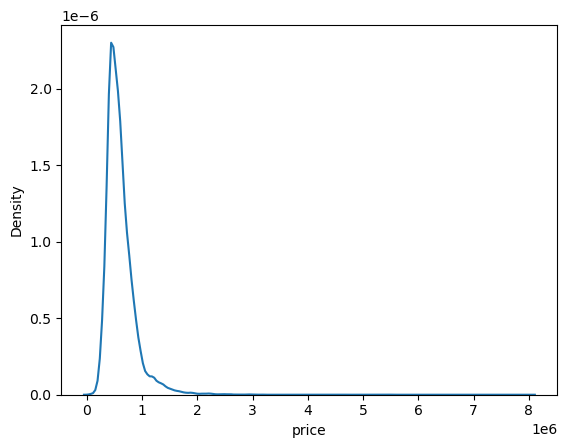

In [19]:
import seaborn as sns
sns.kdeplot(data.price)

In [20]:
data['price_transformed'] = np.log(data.price)

In [21]:
data.price_transformed.skew()

np.float64(0.4731646269984763)

In [22]:
list2 = find_anomalies(data['price_transformed'])

<Axes: xlabel='price_transformed', ylabel='Density'>

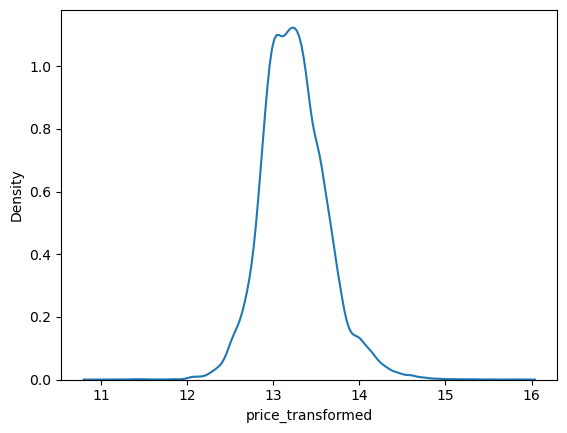

In [24]:
import seaborn as sns
sns.kdeplot(data.price_transformed)

In [27]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [28]:
data.price_transformed_double.skew()

np.float64(0.33092530655758573)

In [29]:
list3 = find_anomalies(data['price_transformed_double'])

<Axes: xlabel='price_transformed_double', ylabel='Density'>

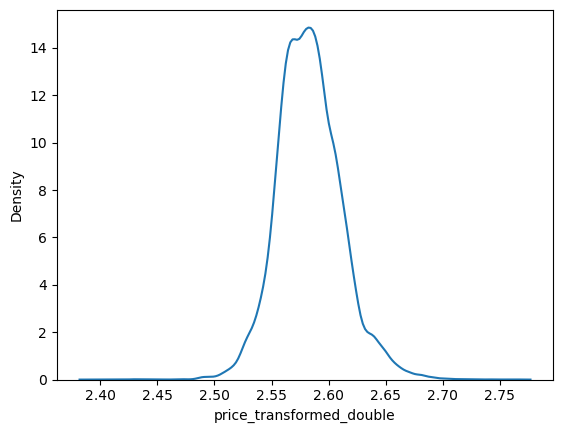

In [30]:
import seaborn as sns
sns.kdeplot(data.price_transformed_double)

Anything below 40 and above 80 are outliers

BOXPLOTS

<Axes: >

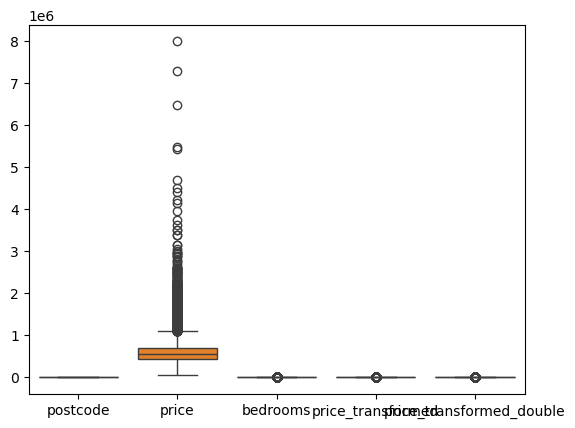

In [31]:
sns.boxplot(data=data)

It considers everything above 75 or below 35 to be an outlier

IQR = Q3 - Q1